In [5]:
import matplotlib.pyplot as plt
import os, re
# 그래프 그리기
def draw_graph6(txt_files, results_list, data_value_list_index:int):
    fig, axes = plt.subplots(3, 2, figsize=(15, 20))
    axes = axes.ravel()
    color_map = plt.get_cmap("tab10", len(txt_files))

    metrics = ["avg", "min", "med", "max", "p(90)", "p(95)"]
    for idx, metric in enumerate(metrics):
        ax = axes[idx]
        handles = []
        labels = []
        for file_idx, (file, results) in enumerate(zip(txt_files, results_list)):
            data = {key: value[metric] for key, value in results.items() if metric in value}
            if data:
                server_type = re.search(r'_[^_]*$', os.path.splitext(file)[0]).group(0)[1:]
                handle = ax.barh(server_type, list(data.values())[5], color=color_map(file_idx)) # 숫자변경하면 데이터도 바뀜
                handles.append(handle)
                labels.append(server_type)
        
        ax.set_title(f"{metric} comparison")
        ax.set_xlabel("Time (microseconds)")
        ax.legend(handles, labels, loc="best")

    plt.tight_layout()
    plt.show()

utf-8 console_output_20230410_211247_go1.20.3.txt {'http_req_blocked': {'avg': 9350.0, 'min': 2.91, 'med': 12.91, 'max': 293720.0, 'p(90)': 23.19, 'p(95)': 69.79}, 'http_req_connecting': {'avg': 9330.0, 'min': 0.0, 'med': 0.0, 'max': 293660.0, 'p(90)': 0.0, 'p(95)': 0.0}, 'http_req_duration': {'avg': 113360.0, 'min': 25920.0, 'med': 94530.0, 'max': 460850.0, 'p(90)': 203720.0, 'p(95)': 242430.0}, 'http_req_receiving': {'avg': 173.94, 'min': 17.76, 'med': 133.22, 'max': 1560.0, 'p(90)': 300.09, 'p(95)': 441.4}, 'http_req_sending': {'avg': 67.75, 'min': 10.2, 'med': 46.25, 'max': 1540.0, 'p(90)': 109.61, 'p(95)': 154.77}, 'http_req_waiting': {'avg': 113120.0, 'min': 25780.0, 'med': 94270.0, 'max': 460690.0, 'p(90)': 203510.0, 'p(95)': 242260.0}}
utf-8 console_output_20230410_211355_java20.txt {'http_req_blocked': {'avg': 3360.0, 'min': 2.91, 'med': 12.91, 'max': 94230.0, 'p(90)': 21.35, 'p(95)': 59.4}, 'http_req_connecting': {'avg': 3340.0, 'min': 0.0, 'med': 0.0, 'max': 94180.0, 'p(90)'

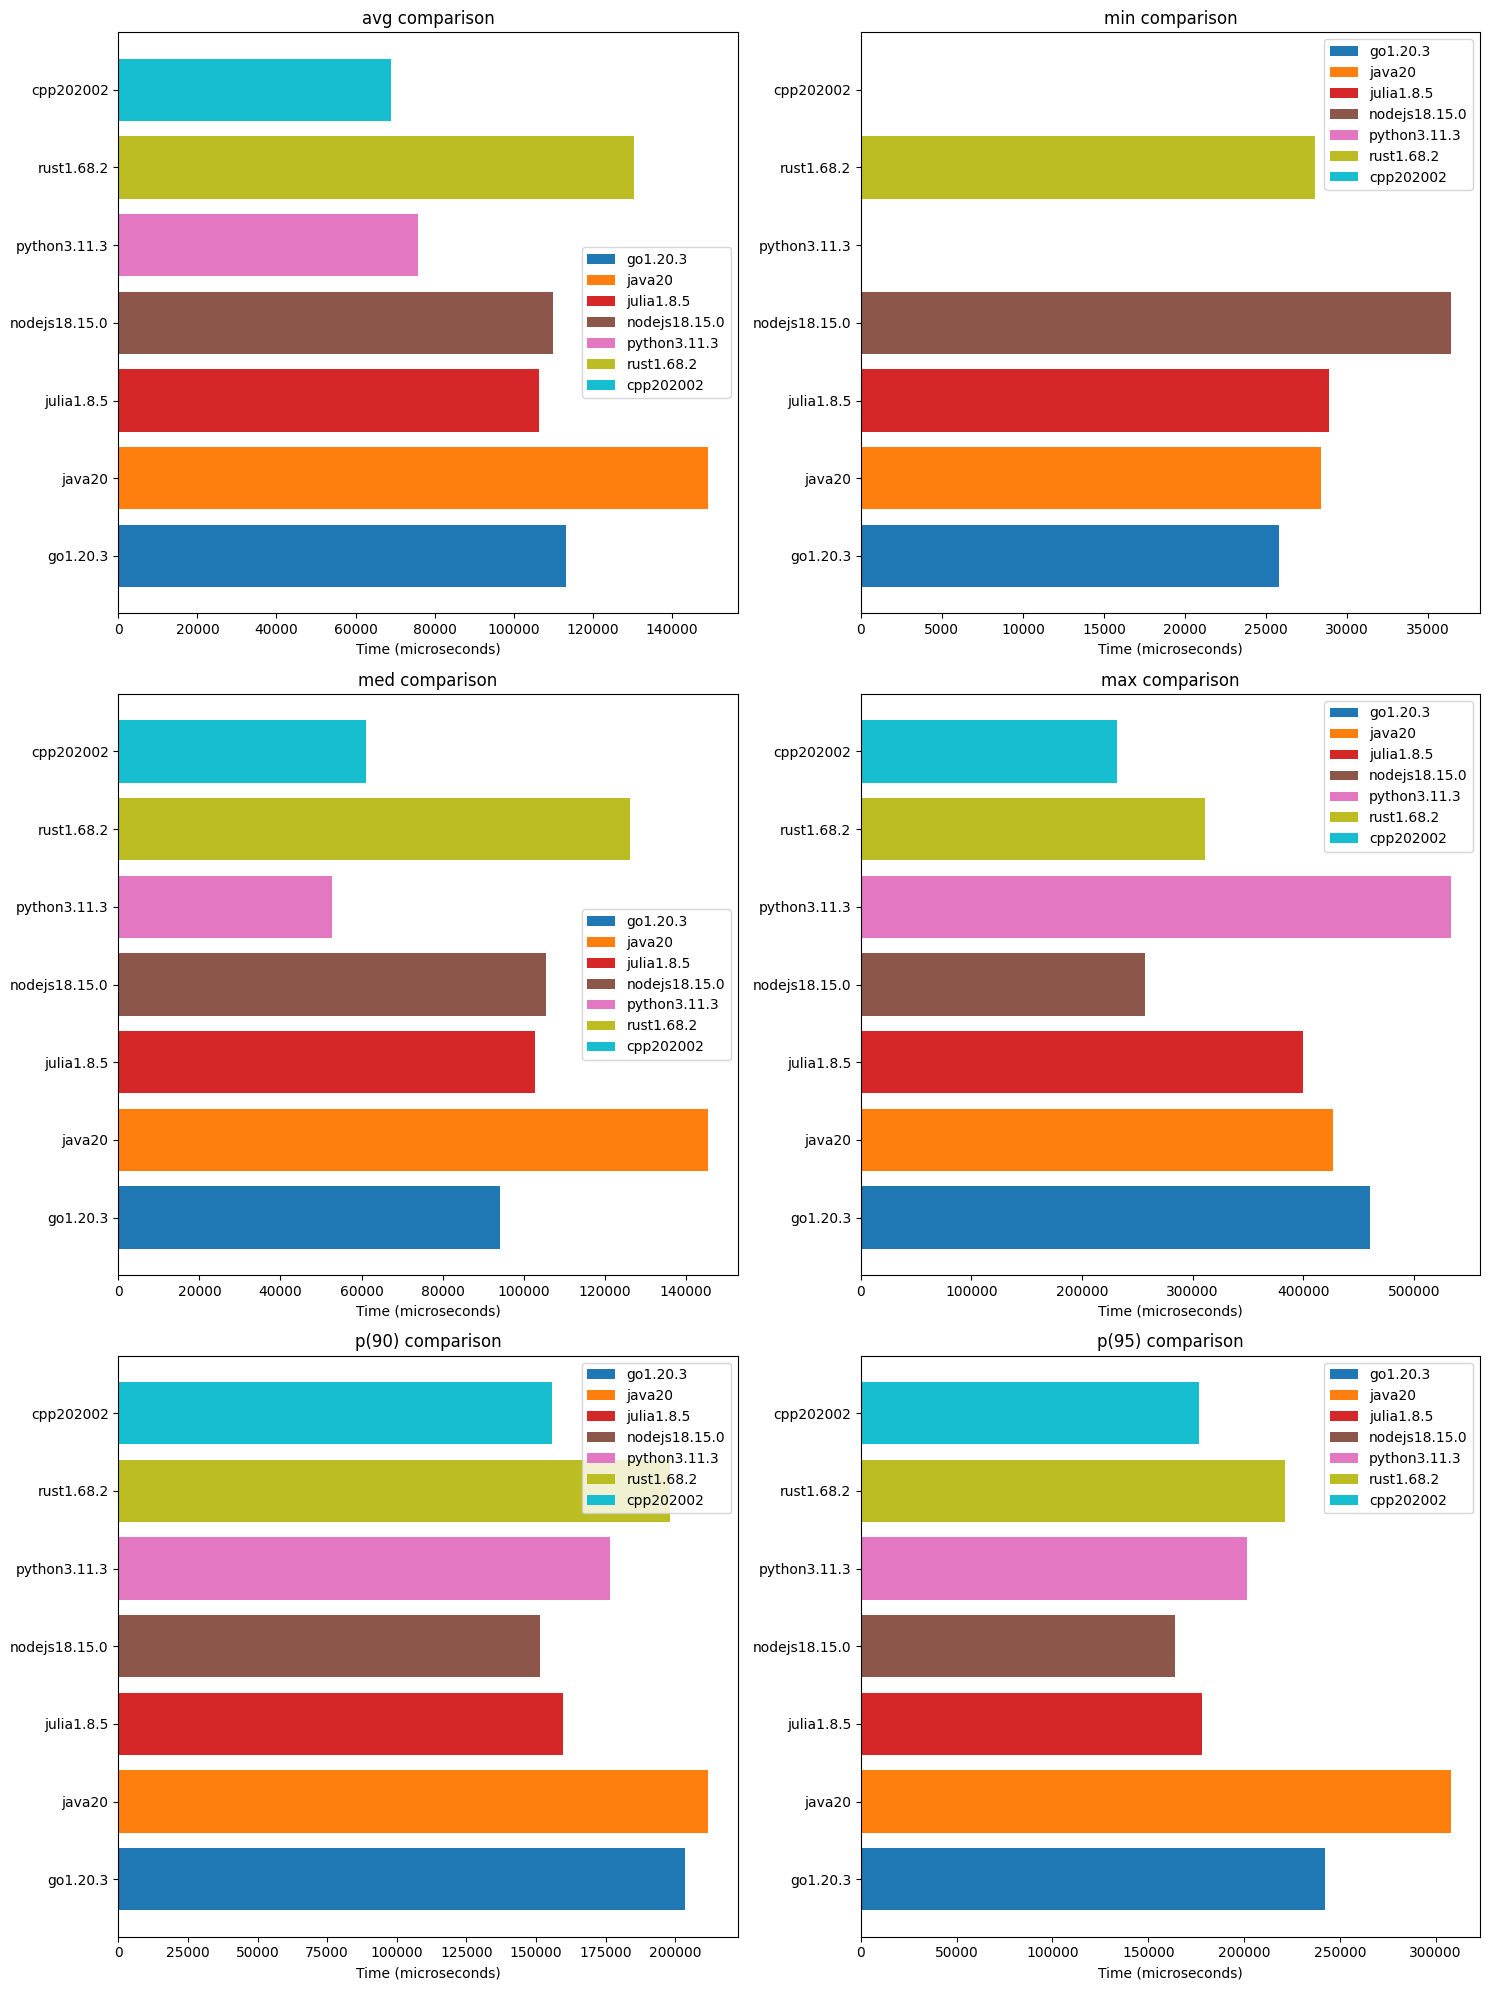

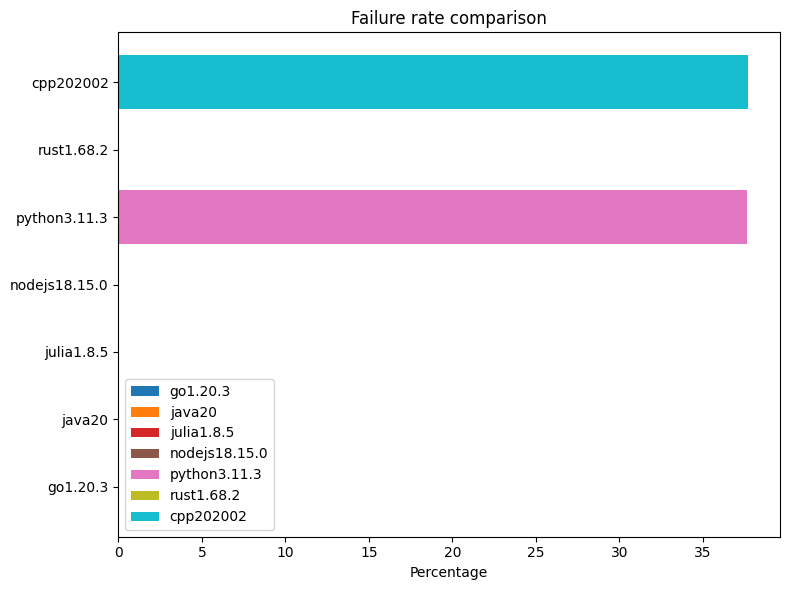

In [6]:
import re, os
import pandas as pd
import matplotlib.pyplot as plt
import chardet
# 컬러맵 사용
import matplotlib.cm as cm  

def convert_to_microseconds(value, unit):
    if unit == "µs":
        return value
    elif unit == "ms":
        return value * 1000
    elif unit == "s":
        return value * 1000 * 1000
    else:
        raise ValueError(f"Unknown unit: {unit}")

# 디렉토리 경로 설정
dir_path = "./result"

# 디렉토리 내의 모든 파일 목록을 가져옴
file_list = os.listdir(dir_path)

# txt 파일만 추려냄
txt_files = [file for file in file_list if file.endswith('.txt')]

# txt 파일을 하나씩 열어서 내용을 출력
results_list = []
failure_rate = []
for file in txt_files:

    # 텍스트 파일을 바이너리 모드로 열기
    with open(os.path.join(dir_path, file), 'rb') as f:
        # 파일 내용 읽기
        contents = f.read()
        # 파일 내용의 인코딩을 감지
        result = chardet.detect(contents)
    with open(os.path.join(dir_path, file), 'r', encoding=result["encoding"]) as f:
        text = f.read()

        patterns = {
            "http_req_blocked": r"http_req_blocked[^:]*: avg=(\d+(\.\d+)?)(\w+)\s+min=(\d+(\.\d+)?)(\w+)\s+med=(\d+(\.\d+)?)(\w+)\s+max=(\d+(\.\d+)?)(\w+)\s+p\(90\)=(\d+(\.\d+)?)(\w+)\s+p\(95\)=(\d+(\.\d+)?)(\w+)",
            "http_req_connecting": r"http_req_connecting[^:]*: avg=(\d+(\.\d+)?)(\w+)\s+min=(\d+(\.\d+)?)(\w+)\s+med=(\d+(\.\d+)?)(\w+)\s+max=(\d+(\.\d+)?)(\w+)\s+p\(90\)=(\d+(\.\d+)?)(\w+)\s+p\(95\)=(\d+(\.\d+)?)(\w+)",
            "http_req_duration": r"http_req_duration[^:]*: avg=(\d+(\.\d+)?)(\w+)\s+min=(\d+(\.\d+)?)(\w+)\s+med=(\d+(\.\d+)?)(\w+)\s+max=(\d+(\.\d+)?)(\w+)\s+p\(90\)=(\d+(\.\d+)?)(\w+)\s+p\(95\)=(\d+(\.\d+)?)(\w+)",
            "http_req_failed": r"http_req_failed[^:]*: (\d+(\.\d+)?)%",
            "http_req_receiving": r"http_req_receiving[^:]*: avg=(\d+(\.\d+)?)(\w+)\s+min=(\d+(\.\d+)?)(\w+)\s+med=(\d+(\.\d+)?)(\w+)\s+max=(\d+(\.\d+)?)(\w+)\s+p\(90\)=(\d+(\.\d+)?)(\w+)\s+p\(95\)=(\d+(\.\d+)?)(\w+)",
            "http_req_sending": r"http_req_sending[^:]*: avg=(\d+(\.\d+)?)(\w+)\s+min=(\d+(\.\d+)?)(\w+)\s+med=(\d+(\.\d+)?)(\w+)\s+max=(\d+(\.\d+)?)(\w+)\s+p\(90\)=(\d+(\.\d+)?)(\w+)\s+p\(95\)=(\d+(\.\d+)?)(\w+)",
            "http_req_waiting": r"http_req_waiting[^:]*: avg=(\d+(\.\d+)?)(\w+)\s+min=(\d+(\.\d+)?)(\w+)\s+med=(\d+(\.\d+)?)(\w+)\s+max=(\d+(\.\d+)?)(\w+)\s+p\(90\)=(\d+(\.\d+)?)(\w+)\s+p\(95\)=(\d+(\.\d+)?)(\w+)",
        }

        results = {}
        for key, pattern in patterns.items():
            match = re.search(pattern, text)
            if match and len(match.groups()) >2:
                results[key] = {
                    "avg": convert_to_microseconds(float(match.group(1)), match.group(3)),
                    "min": convert_to_microseconds(float(match.group(4)), match.group(6)),
                    "med": convert_to_microseconds(float(match.group(7)), match.group(9)),
                    "max": convert_to_microseconds(float(match.group(10)), match.group(12)),
                    "p(90)": convert_to_microseconds(float(match.group(13)), match.group(15)),
                    "p(95)": convert_to_microseconds(float(match.group(16)), match.group(18)),
                }
            else:
                failure_rate.append(match.group(1))
        print(result["encoding"], file, results)
        results_list.append(results)
        
# 그래프 그리기
print('http_req_blocked')
draw_graph6(txt_files, results_list, 0)

# http_req_failed 그래프 그리기
fig, ax = plt.subplots(figsize=(8, 6))
color_map = plt.get_cmap("tab10", len(txt_files))

handles = []
labels = []

for file_idx, (file, rate) in enumerate(zip(txt_files, failure_rate)):
    server_type = re.search(r'_[^_]*$', os.path.splitext(file)[0]).group(0)[1:]
    handle = ax.barh(server_type, float(rate), color=color_map(file_idx))
    handles.append(handle)
    labels.append(server_type)

ax.set_title("Failure rate comparison")
ax.set_xlabel("Percentage")
ax.legend(handles, labels, loc="best")

plt.tight_layout()
plt.show()




http_req_blocked


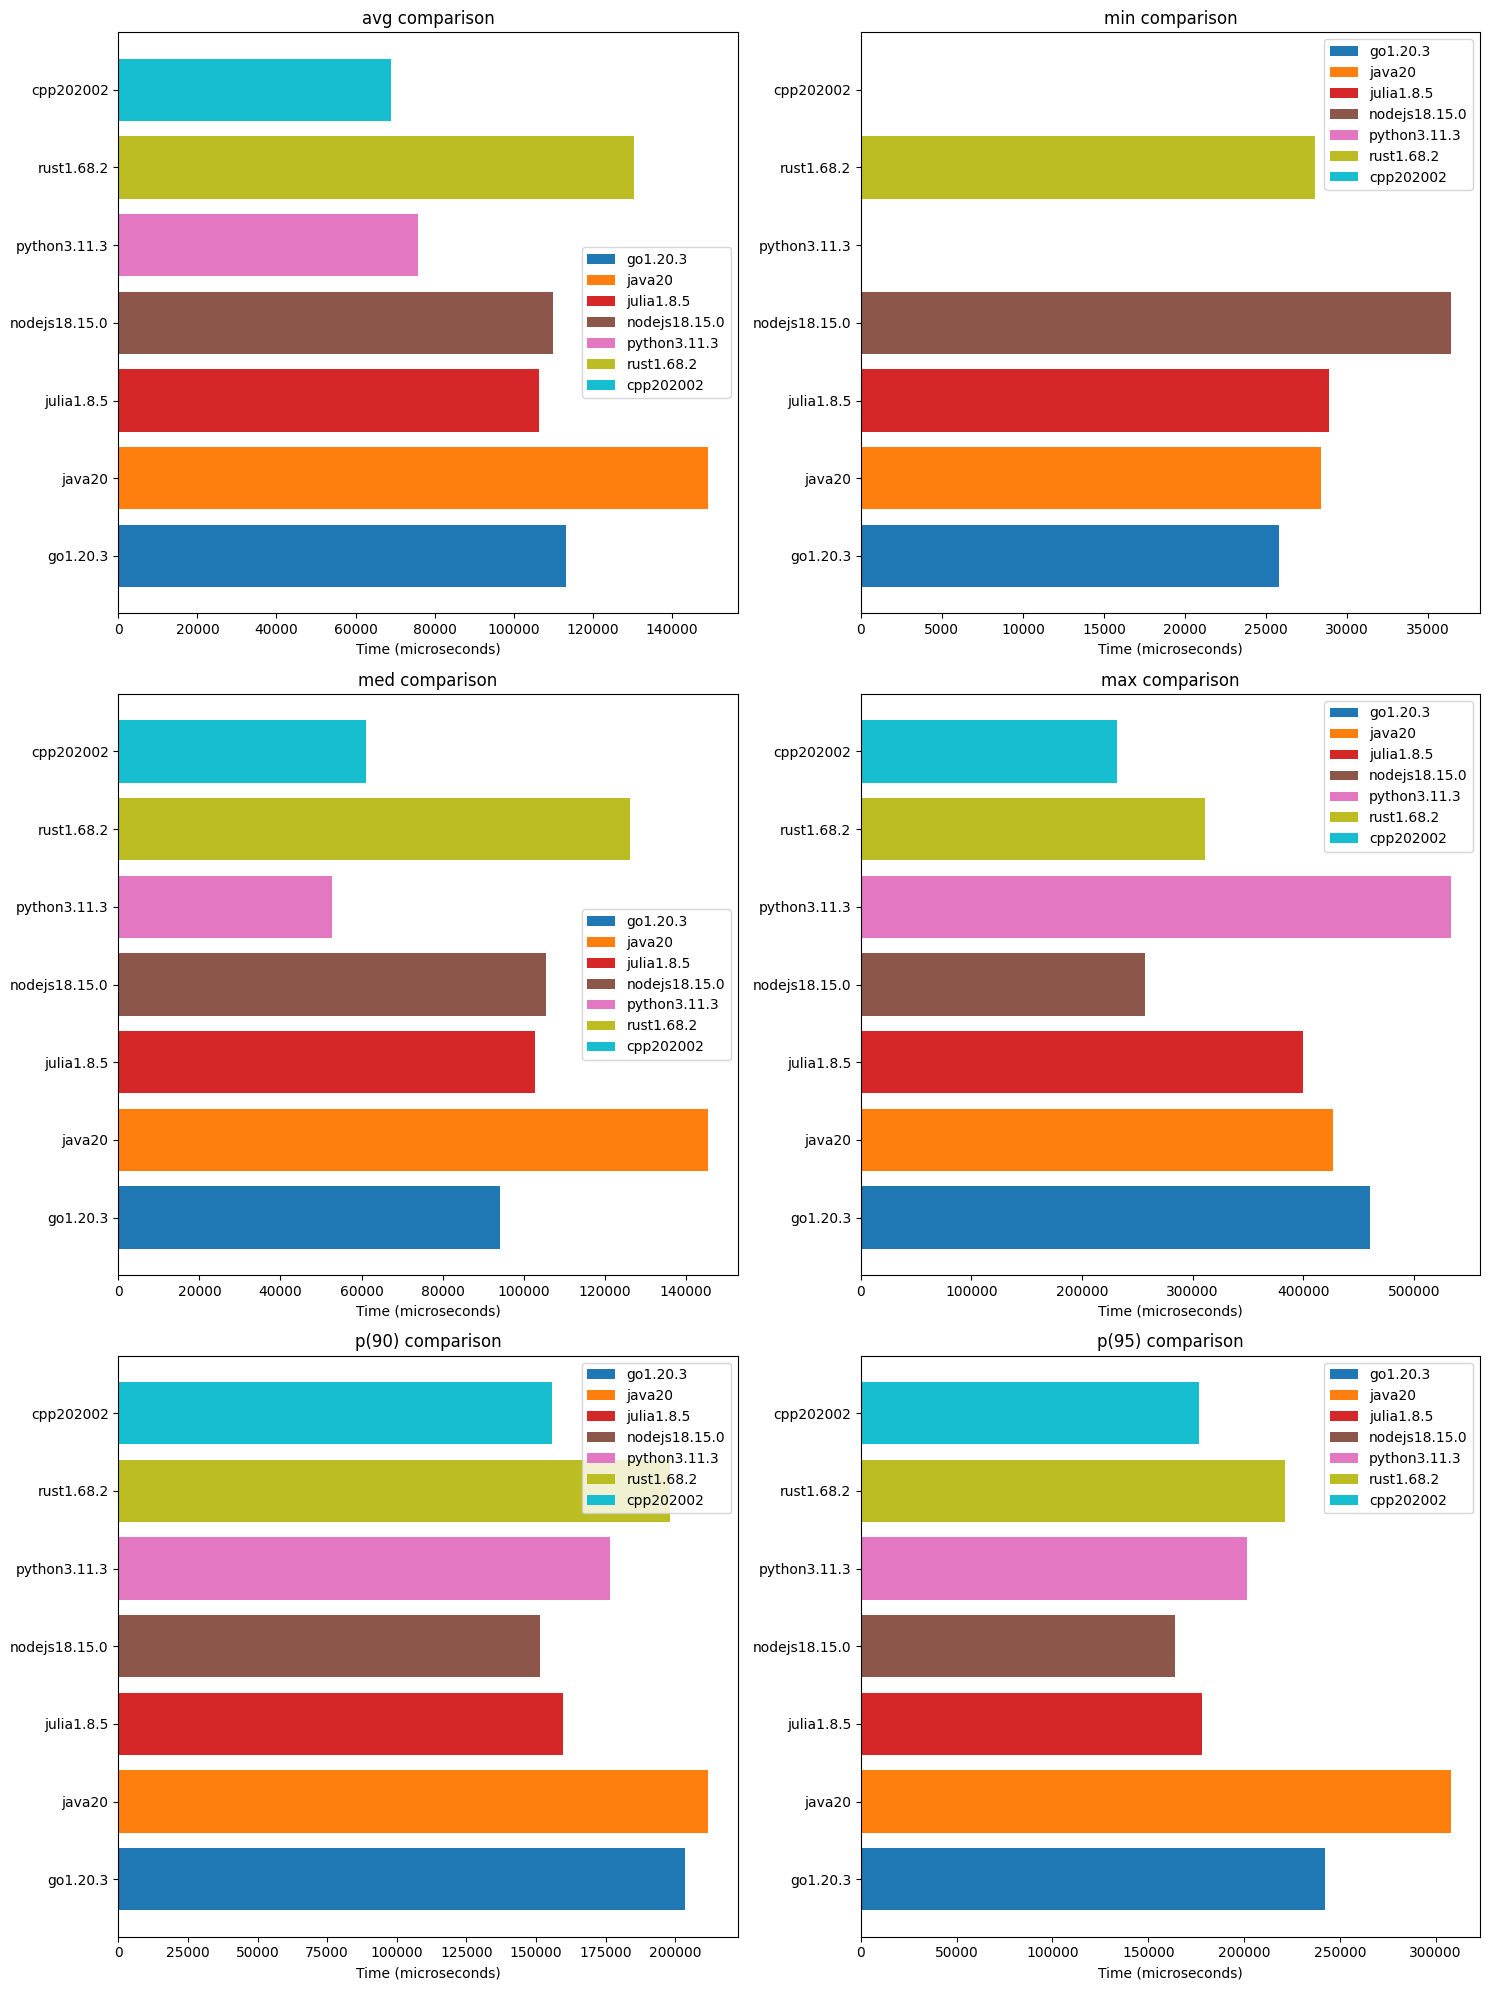

In [7]:
# 그래프 그리기
print('http_req_blocked')
draw_graph6(txt_files, results_list, 1)

http_req_connecting


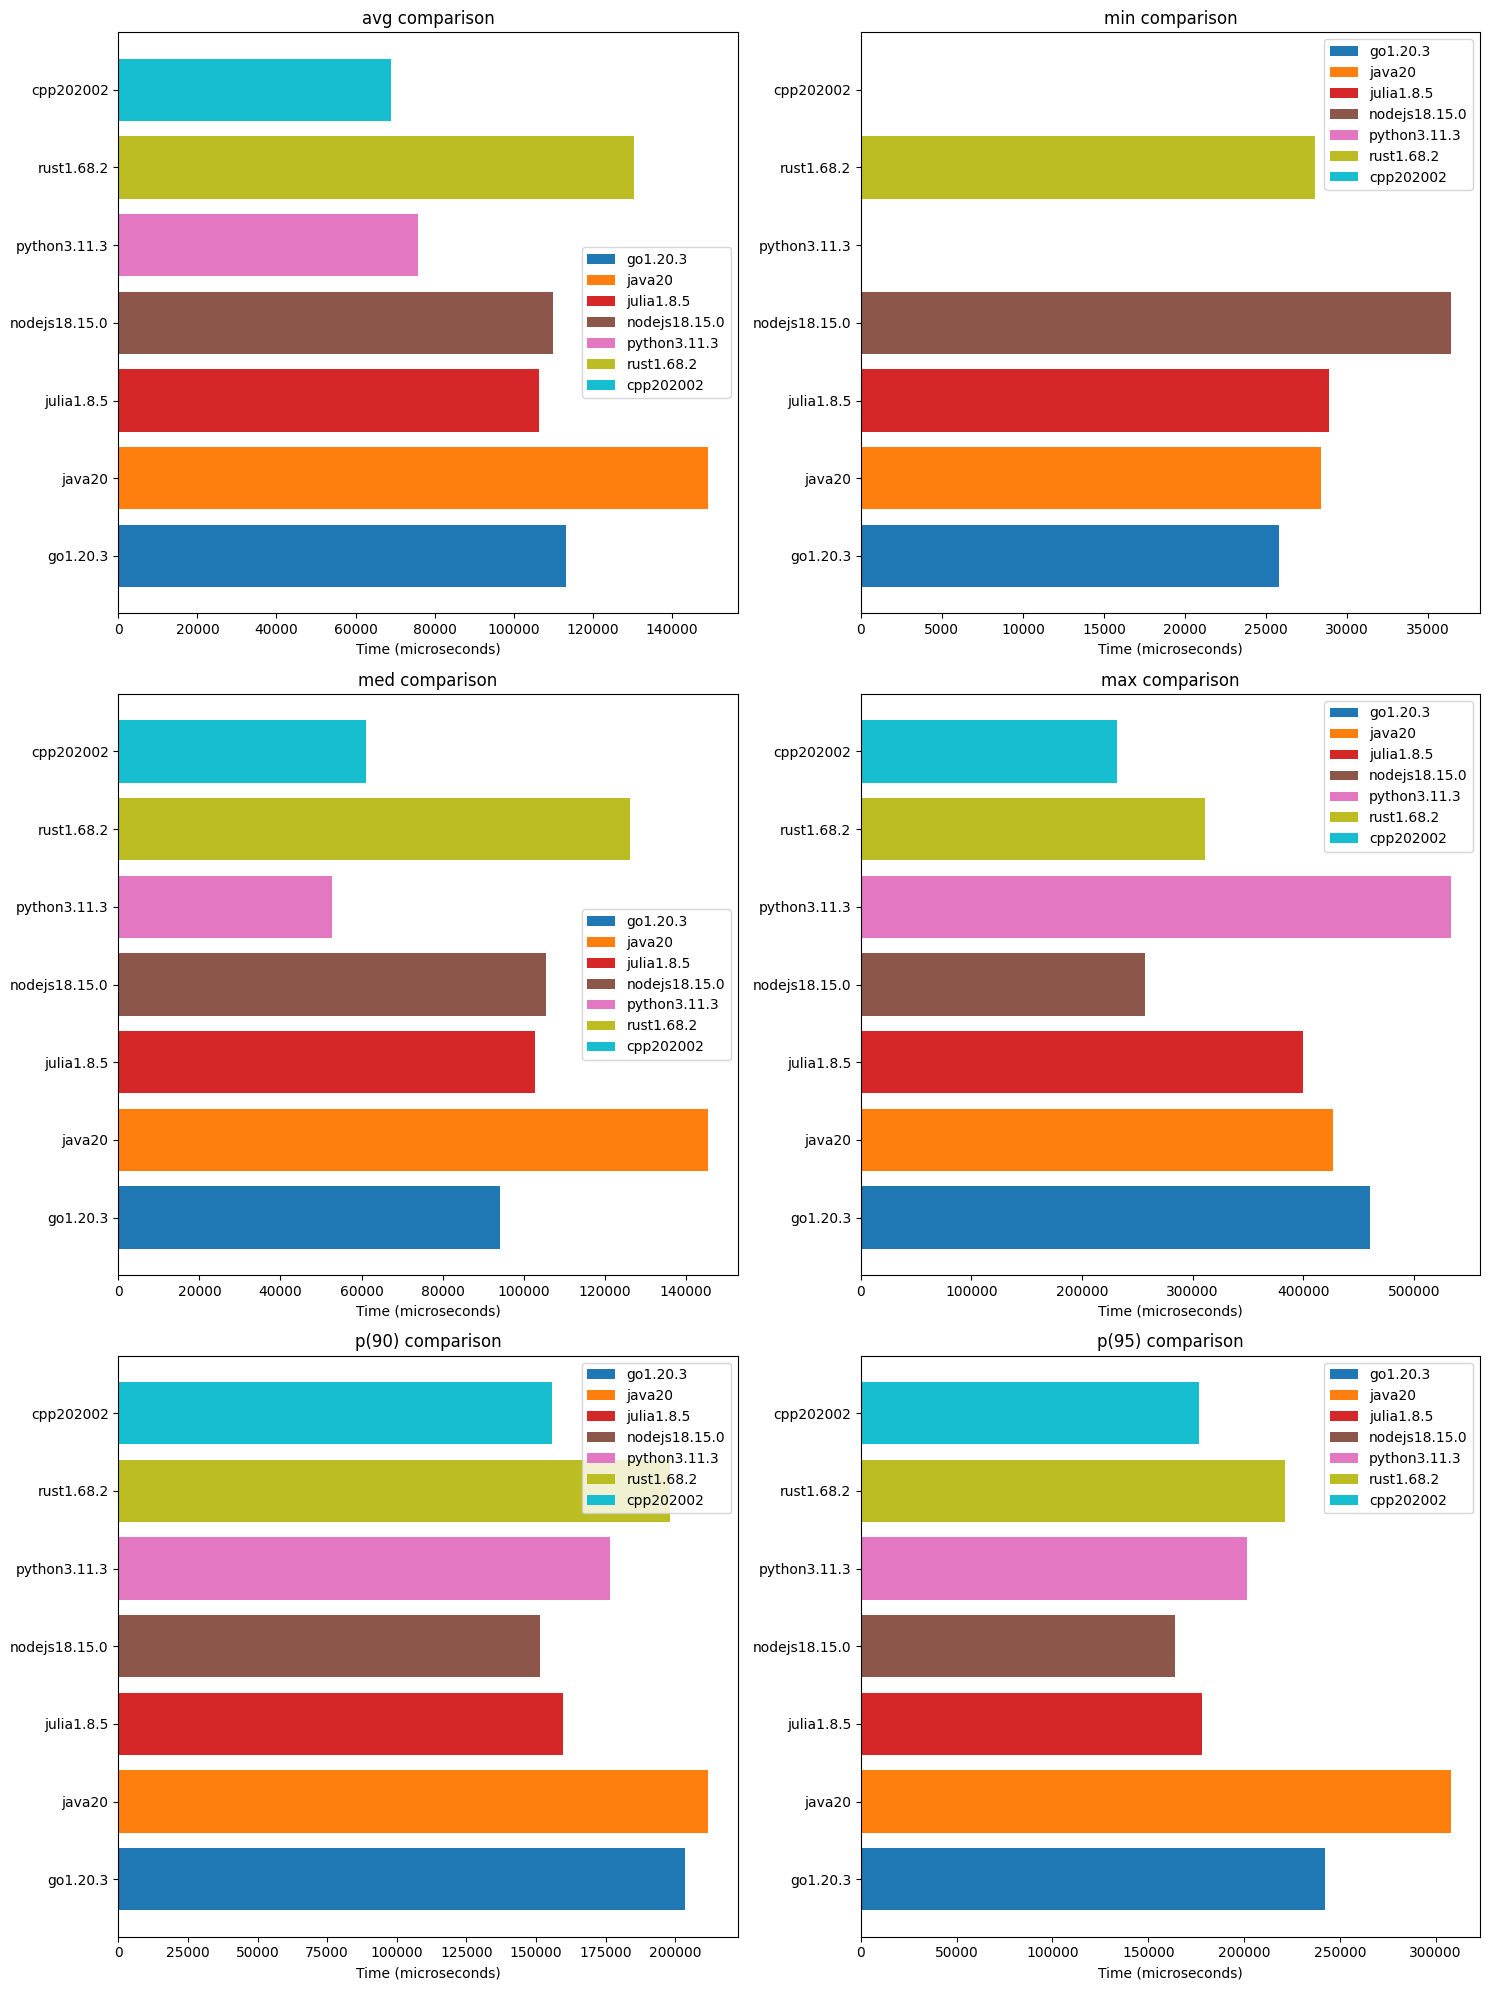

In [8]:
# 그래프 그리기
print('http_req_connecting')
draw_graph6(txt_files, results_list, 2)

http_req_duration


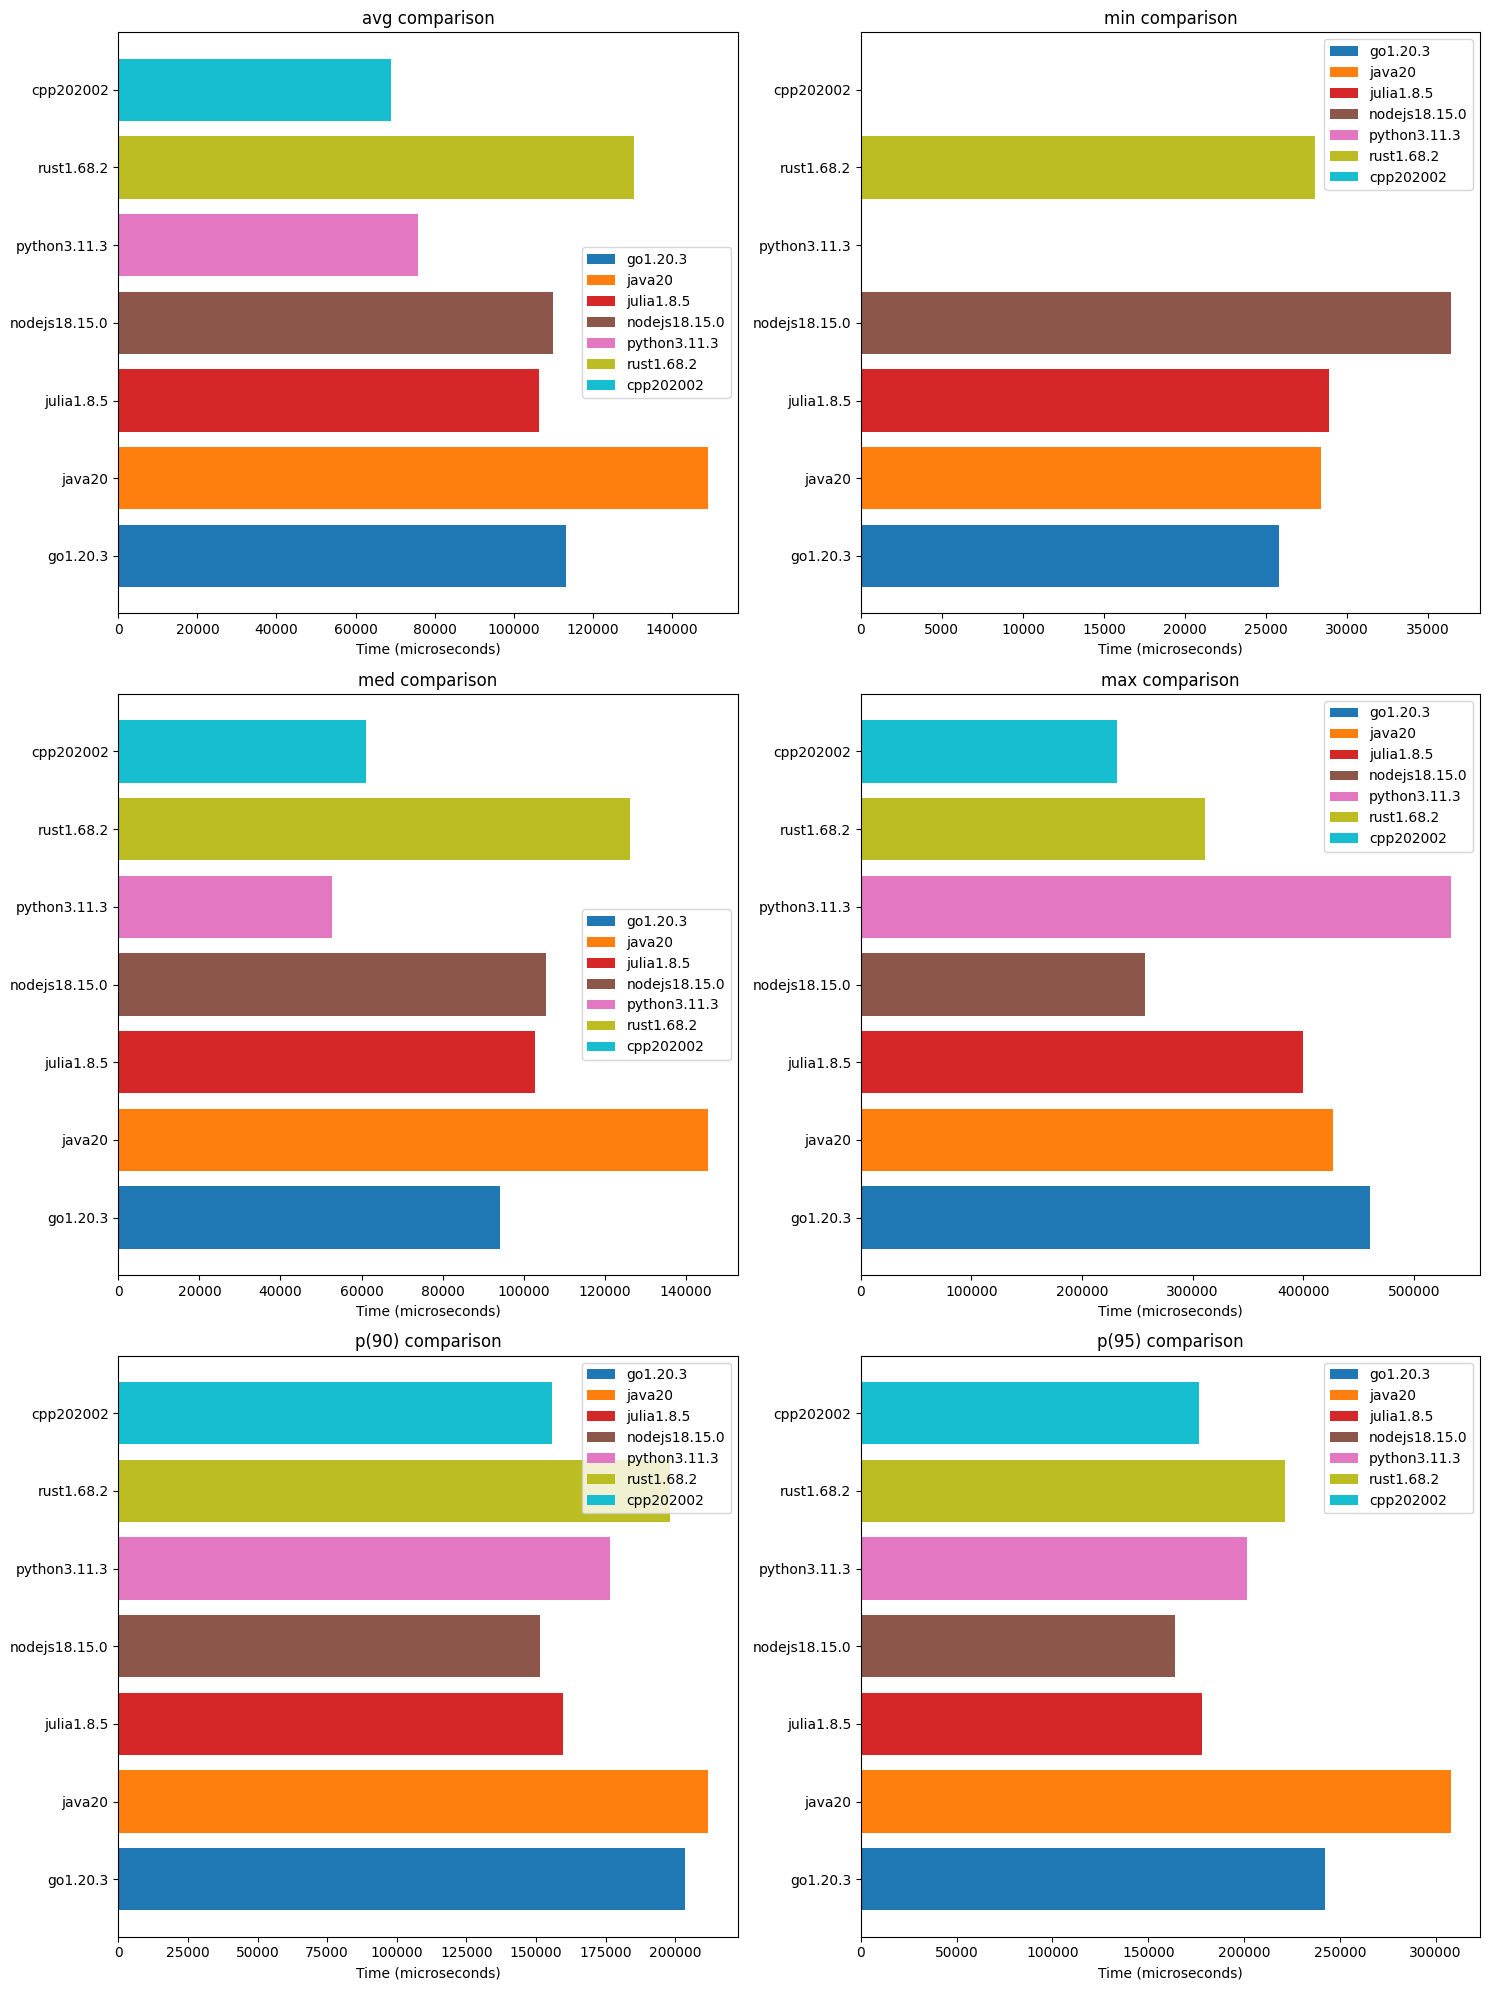

In [9]:
# 그래프 그리기
print('http_req_duration')
draw_graph6(txt_files, results_list, 3)

http_req_receiving


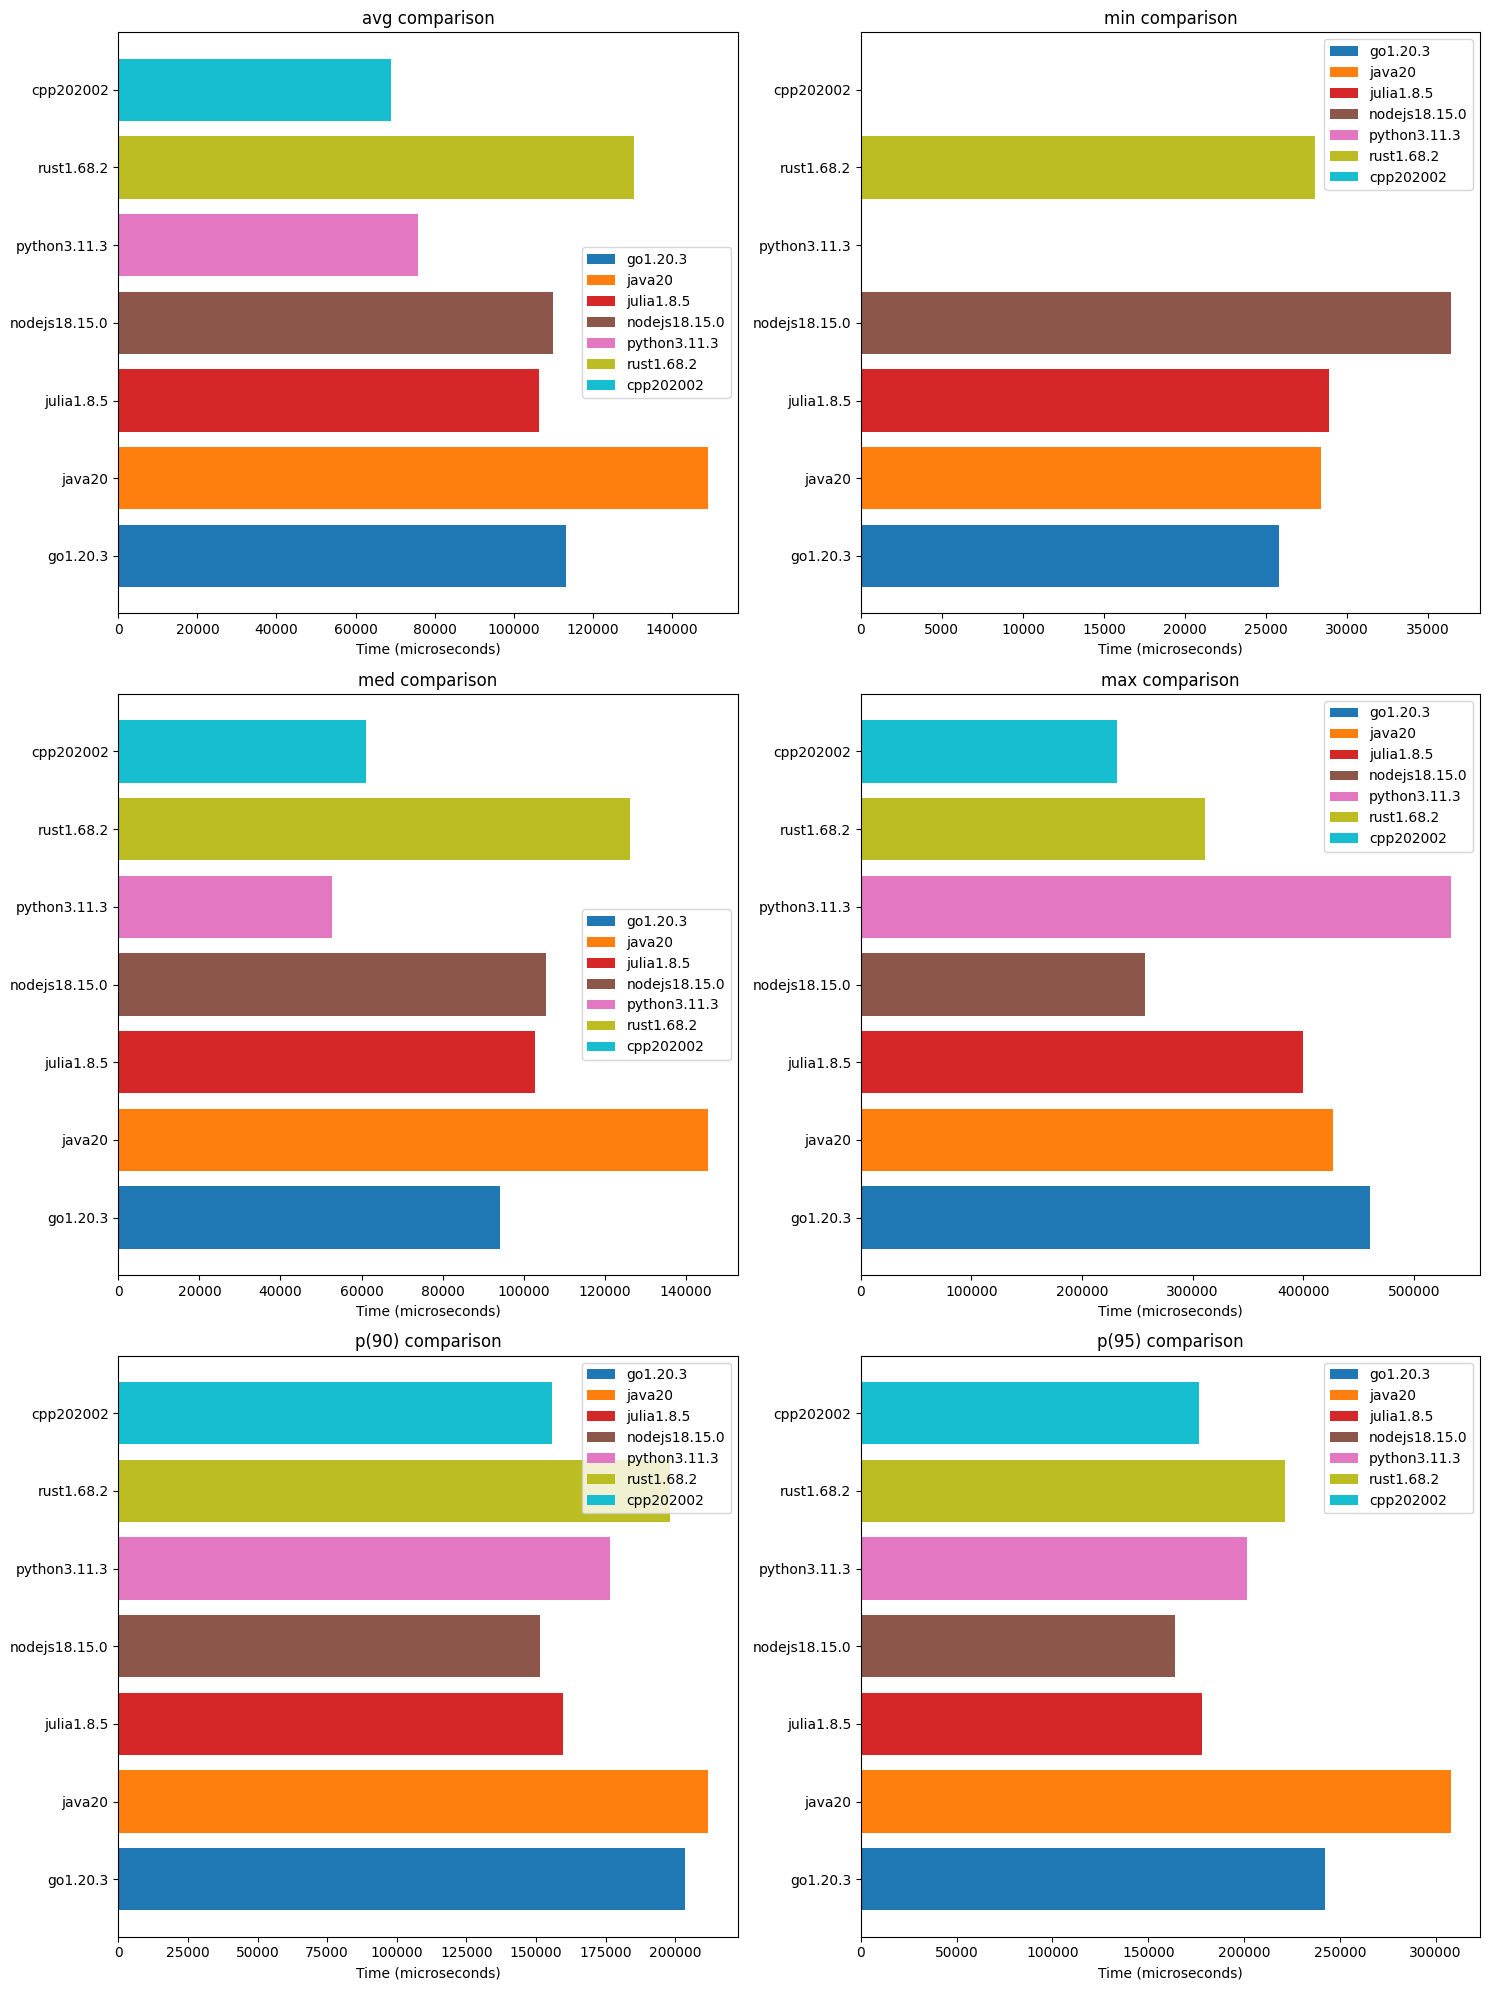

In [10]:
# 그래프 그리기
print('http_req_receiving')
draw_graph6(txt_files, results_list, 4)

http_req_sending


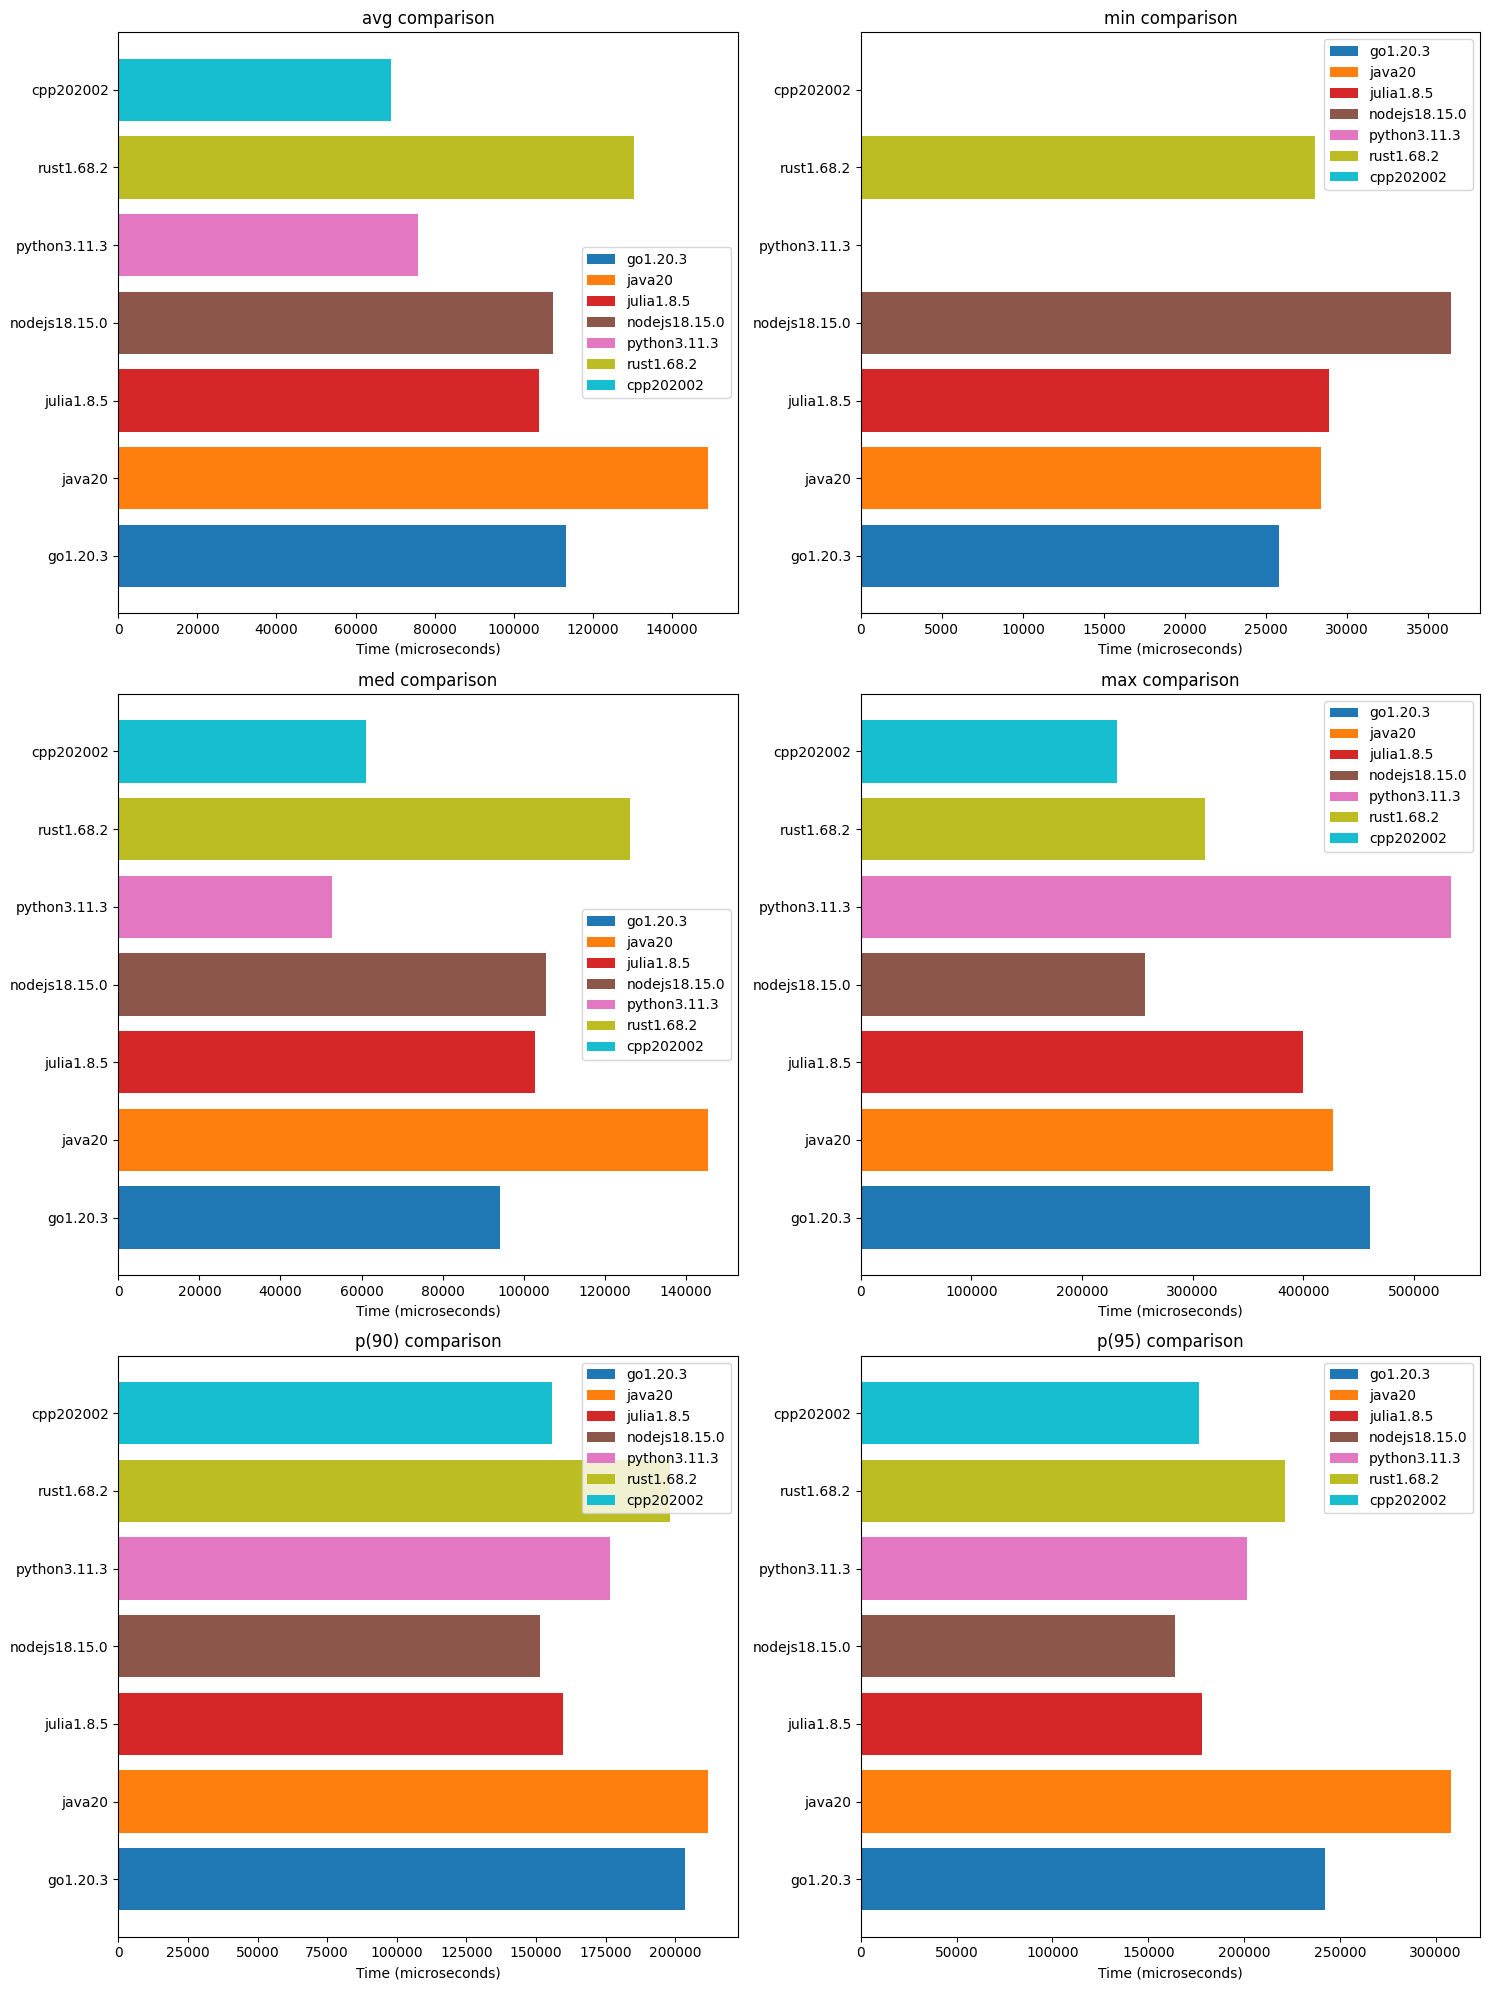

In [11]:
# 그래프 그리기
print('http_req_sending')
draw_graph6(txt_files, results_list, 5)

In [13]:
import chardet

# 텍스트 파일을 바이너리 모드로 열기
with open('result/console_output_20230410_211247_go1.20.3.txt', 'rb') as f:
    # 파일 내용 읽기
    contents = f.read()
    # 파일 내용의 인코딩을 감지
    result = chardet.detect(contents)
    # 인코딩 정보 출력
    print(result)

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


In [15]:
import matplotlib
print(chardet.__version__)
print(matplotlib.__version__)

5.1.0
3.7.1
